<img src="https://dev.skillup.online/asset-v1:SkillUp+SKOAI101+PLU_2021_1+type@asset+block@SKO.png" width="250" align="center">

<h1 align="center"><font size="5"> Analyzing and Visualizing Covid-19 Cases</font></h1>

## Importing Libraries

In [1]:
# import libraries
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline

## Reading Data Set

In [2]:
# Read the data set using read_csv function

import pandas as pd

df = pd.read_csv("Covid_19_cases.csv")

### Get glimpse of data

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31/05/2021,31,5,2021,366,5,Austria
1,30/05/2021,30,5,2021,570,6,Austria
2,29/05/2021,29,5,2021,538,11,Austria
3,28/05/2021,28,5,2021,639,4,Austria
4,27/05/2021,27,5,2021,405,19,Austria


In [4]:
# consider the columns 'cases', 'deaths', 'countriesAndTerritories' and prepare a new dataframe
# Write your code here
df['new_cases'] = df.groupby(['countriesAndTerritories'])['cases'].diff()
df['new_cases'].fillna(0, inplace=True)
print(df[['dateRep', 'countriesAndTerritories', 'cases', 'new_cases']])

         dateRep countriesAndTerritories  cases  new_cases
0     31/05/2021                 Austria    366        0.0
1     30/05/2021                 Austria    570      204.0
2     29/05/2021                 Austria    538      -32.0
3     28/05/2021                 Austria    639      101.0
4     27/05/2021                 Austria    405     -234.0
...          ...                     ...    ...        ...
2725    6/3/2021                  Sweden   3455     2004.0
2726    5/3/2021                  Sweden   4069      614.0
2727    4/3/2021                  Sweden   4884      815.0
2728    3/3/2021                  Sweden   4876       -8.0
2729    2/3/2021                  Sweden   6191     1315.0

[2730 rows x 4 columns]


<details><summary>Click Here for the Hint</summary>

 

```
    df_new=df[['cases', 'deaths','countriesAndTerritories']]

 

```

 

</details>

In [5]:
# display the first 10 rows of new dataframe
print(df[['dateRep', 'countriesAndTerritories', 'cases', 'new_cases']].head(10))

      dateRep countriesAndTerritories  cases  new_cases
0  31/05/2021                 Austria    366        0.0
1  30/05/2021                 Austria    570      204.0
2  29/05/2021                 Austria    538      -32.0
3  28/05/2021                 Austria    639      101.0
4  27/05/2021                 Austria    405     -234.0
5  26/05/2021                 Austria    287     -118.0
6  25/05/2021                 Austria    342       55.0
7  24/05/2021                 Austria    520      178.0
8  23/05/2021                 Austria    626      106.0
9  22/05/2021                 Austria    671       45.0


### Q1. Use groupby on <code>countriesAndTerritories</code> to find total <code>cases</code> and <code>deaths</code>

In [6]:
# Write your code here
grouped_df = df.groupby('countriesAndTerritories').agg({'cases': 'sum', 'deaths': 'sum'})
print(grouped_df.head(10))

                           cases  deaths
countriesAndTerritories                 
Austria                   184416    1925
Belgium                   288119    2696
Bulgaria                  171236    7471
Croatia                   113168    2488
Cyprus                     37700     129
Czechia                   421221    9639
Denmark                    69188     155
Estonia                    62916     654
Finland                    34760     177
France                   2020808   22977


### Q2. Find top five countries in terms of <code>cases</code>, store them in a new dataframe and Visualize them

   index     dateRep  day  month  year  cases  deaths countriesAndTerritories
0    873    7/4/2021    7      4  2021  53843     426                  France
1    881  30/03/2021   30      3  2021  53130     360                  France
2    888  23/03/2021   23      3  2021  46939     343                  France
3    867  13/04/2021   13      4  2021  46289     385                  France
4    880  31/03/2021   31      3  2021  43554     381                  France


<Axes: xlabel='countriesAndTerritories', ylabel='cases'>

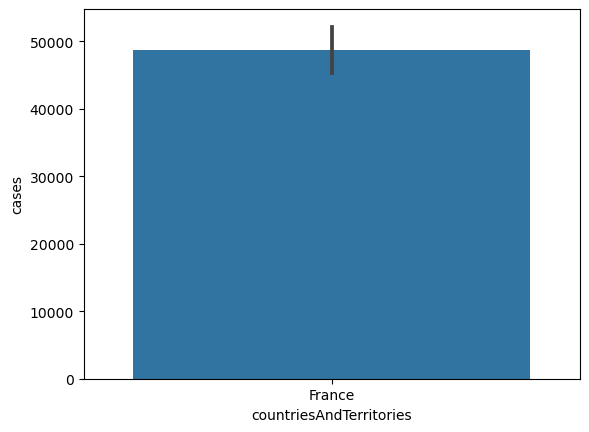

In [7]:
# Write your code here
import pandas as pd

df = pd.read_csv("Covid_19_cases.csv")
    
df_top_five_cases = df.sort_values(by='cases', ascending=False).head(5)
df_top_five_cases.reset_index(inplace=True)
print(df_top_five_cases)
sns.barplot(x='countriesAndTerritories',y='cases',data=df_top_five_cases)

<details><summary>Click Here for the Hint</summary>

 

```
    df_top_five_cases=df_cases.sort_values(by='cases',ascending=False)
    df_top_five_cases=df_top_five_cases.head(5)
    df_top_five_cases.reset_index(inplace=True)
    print(df_top_five_cases)
    sns.barplot(x='countriesAndTerritories',y='cases',data=df_top_five_cases)

 

```

 

</details>

### Q3. Find top five countries in terms of <code>deaths</code>, store them in a new dataframe and Visualize them

   index     dateRep  day  month  year  cases  deaths countriesAndTerritories
0   2145    9/4/2021    9      4  2021  27890     956                  Poland
1    884  27/03/2021   27      3  2021  39932     897                  France
2   2139  15/04/2021   15      4  2021  21266     804                  Poland
3   2144   10/4/2021   10      4  2021  28499     768                  Poland
4   2143   11/4/2021   11      4  2021  24892     749                  Poland


<Axes: xlabel='countriesAndTerritories', ylabel='deaths'>

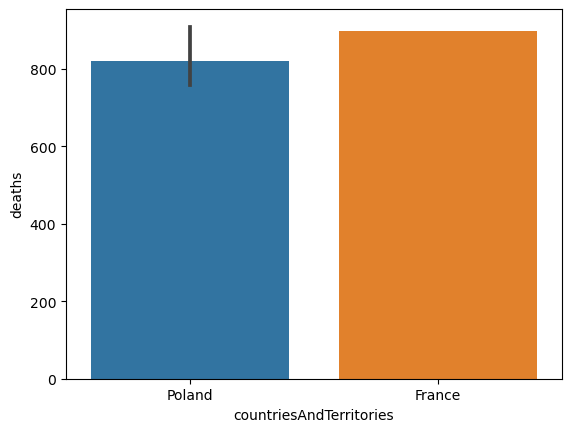

In [8]:
# Write your code here
df_top_five_deaths = df.sort_values(by='deaths', ascending=False).head(5)
df_top_five_deaths.reset_index(inplace=True)
print(df_top_five_deaths)
sns.barplot(x='countriesAndTerritories',y='deaths',data=df_top_five_deaths)

### Q4. Use groupby on <code>countriesAndTerritories</code> to find mean value of <code>cases</code> and <code>deaths</code>

In [9]:
# Write your code here
grouped_df = df.groupby('countriesAndTerritories').agg({'cases': 'mean', 'deaths': 'mean'})
print(grouped_df)

                                cases      deaths
countriesAndTerritories                          
Austria                   2026.549451   21.153846
Belgium                   3166.142857   29.626374
Bulgaria                  1881.714286   82.098901
Croatia                   1243.604396   27.340659
Cyprus                     414.285714    1.417582
Czechia                   4628.802198  105.923077
Denmark                    760.307692    1.703297
Estonia                    691.384615    7.186813
Finland                    381.978022    1.945055
France                   22206.681319  252.494505
Germany                  13561.076923  201.505495
Greece                    2309.901099   60.989011
Hungary                   4083.659341  161.263736
Iceland                      5.791209    0.010989
Ireland                    462.164835    6.835165
Italy                    14183.934066  311.505495
Latvia                     515.516484    8.263736
Liechtenstein                4.802198    0.043956


### Q5. Find top five countries with highest number of average <code>cases</code>, store them in a new dataframe and Visualize them

In [10]:
# Write your code here

df_top_five_cases = grouped_df.sort_values(by='cases', ascending=False).head(5)
df_top_five_cases.reset_index(inplace=True)
print(df_top_five_cases)

  countriesAndTerritories         cases      deaths
0                  France  22206.681319  252.494505
1                   Italy  14183.934066  311.505495
2                 Germany  13561.076923  201.505495
3                  Poland  12801.802198  329.329670
4             Netherlands   6131.681319   22.582418


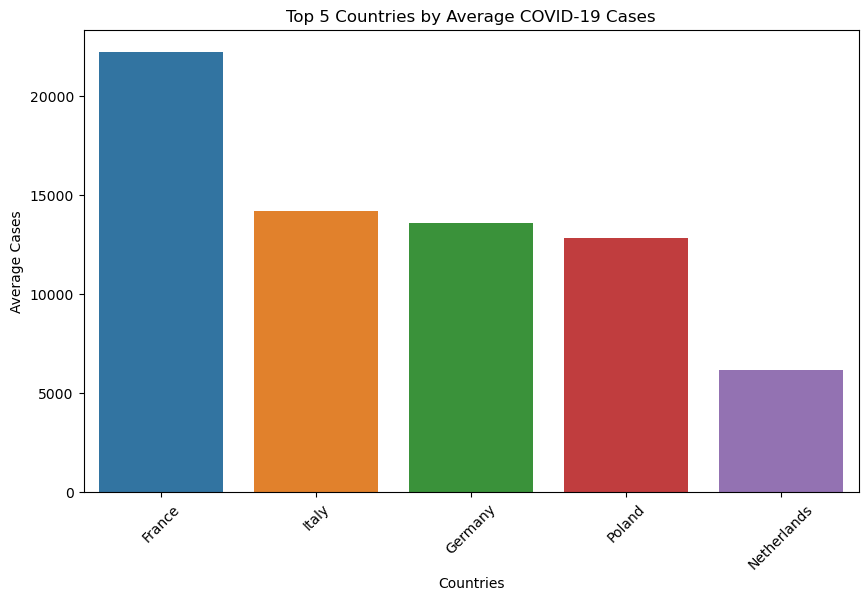

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='countriesAndTerritories', y='cases', data=df_top_five_cases)
plt.xlabel('Countries')
plt.ylabel('Average Cases')
plt.title('Top 5 Countries by Average COVID-19 Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### Q6. Find top five countries with highest number of average <code>deaths</code>, store them in a new dataframe and Visualize them

In [12]:
# Write your code here

df_top_five_deaths = grouped_df.sort_values(by='deaths', ascending=False).head(5)
df_top_five_deaths.reset_index(inplace=True)
print(df_top_five_cases)

  countriesAndTerritories         cases      deaths
0                  France  22206.681319  252.494505
1                   Italy  14183.934066  311.505495
2                 Germany  13561.076923  201.505495
3                  Poland  12801.802198  329.329670
4             Netherlands   6131.681319   22.582418


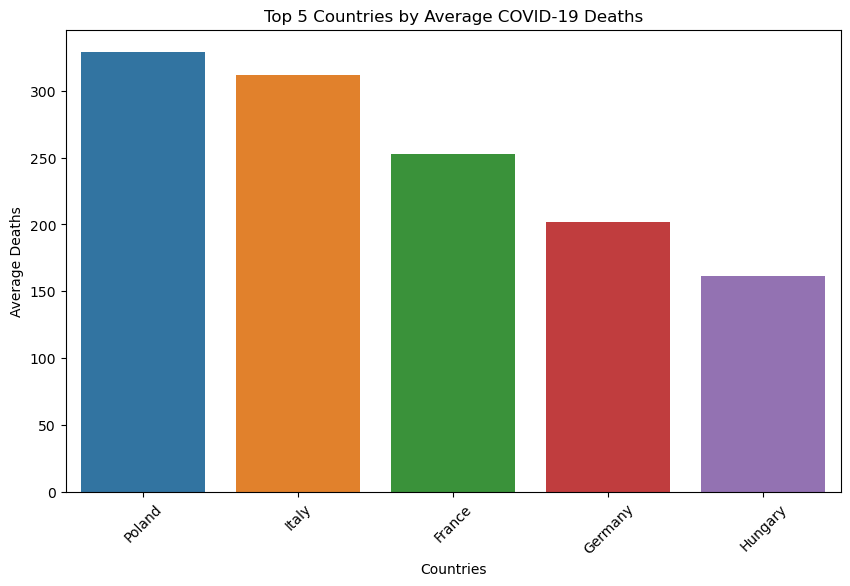

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='countriesAndTerritories', y='deaths', data=df_top_five_deaths)
plt.xlabel('Countries')
plt.ylabel('Average Deaths')
plt.title('Top 5 Countries by Average COVID-19 Deaths')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

## Assignment Notebook Submission 

Once you complete your notebook you will have to share it. Save all your work and download the file. You will be submitting your notebook for peer review in the next section of the course.



## Author(s)

Aditya Singh

## Changelog
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 1.0 | Aditya | Created new version |
|   |   |   |   |
